# Baseline Model Workflow

## Import Packages and Data

In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

In [3]:
train_values = pd.read_csv('/Users/chantalwuerschinger/code/chantalwuer/earthquake_damage/raw_data/challenge_data/train_values.csv')
train_labels = pd.read_csv('/Users/chantalwuerschinger/code/chantalwuer/earthquake_damage/raw_data/challenge_data/train_labels.csv')
test_values = pd.read_csv('/Users/chantalwuerschinger/code/chantalwuer/earthquake_damage/raw_data/challenge_data/test_values.csv')

In [4]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


### Define X and y (Train)

In [6]:
X = train_values.drop(columns=['building_id'])
y = train_labels['damage_grade']

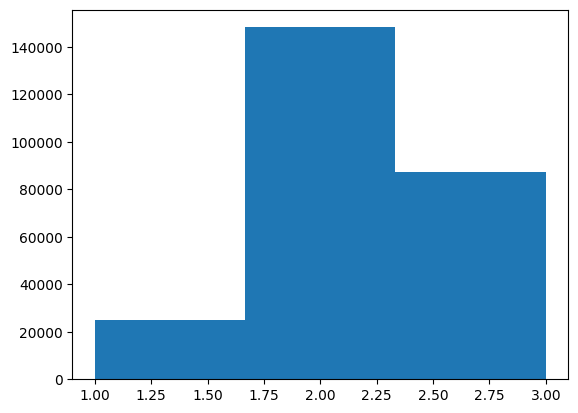

In [7]:
plt.hist(y, bins=3);

In [8]:
X_object = X.select_dtypes(include='object')
X_object.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [9]:
X_int = X.select_dtypes(include='int64')
X_int.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')

In [10]:
X.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Preproc Pipeline

In [11]:
num_transformer = make_pipeline(StandardScaler())
num_col = make_column_selector(dtype_include=['int64'])

cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
cat_col = make_column_selector(dtype_include=['object'])

In [12]:
preproc_basic = make_column_transformer((num_transformer, num_col),
                                        (cat_transformer, cat_col), 
                                        remainder='passthrough')

In [13]:
X_preproc = preproc_basic.fit_transform(X)

In [14]:
X.shape

(260601, 38)

In [15]:
X_preproc.shape

(260601, 68)

### Control Size of Train Dataset

In [16]:
X_train = X[:260601]
y_train = y[:260601]

### Change y_train from 123 to 012

In [17]:
new_values = {1:0, 2:1, 3:2}
y_train = y_train.replace(new_values)
y_train.unique()

array([2, 1, 0])

### Import Preprocessor

In [29]:
from earthquake_damage.ml_logic.preprocessor import preprocess_features

In [30]:
X_processed = preprocess_features(X_train)


Preprocess features...

✅ X_processed, with shape (260601, 68)


In [26]:
from earthquake_damage.ml_logic.test import this_is_a_test_function

this_is_a_test_function()

This is a test function


## Model

### Baseline Model: DecisionTreeClassifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 2)

# pipe_baseline = make_pipeline(preproc_basic, model)

In [47]:
# pipe_baseline.fit(X_train, y_train)
model.fit(X_preproc, y_train)

DecisionTreeClassifier(max_depth=2)

In [48]:
from sklearn.model_selection import cross_val_score

# Cross validate model
model_score = cross_val_score(model, X_preproc, y_train, cv=10, scoring='f1_micro')
model_score = model_score.mean()
model_score

0.5703968960243608

### XGBClassifier

In [49]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_jobs=-1)

# pipe_XGBClass = make_pipeline(preproc_basic, xgb_model)
# pipe_XGBClass.fit(X_train, y_train)

xgb_model.fit(X_preproc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [50]:
# Cross validate model
xgb_model_score = cross_val_score(xgb_model, X_preproc, y_train, cv=10, scoring='f1_micro')
xgb_model_score = xgb_model_score.mean()
xgb_model_score

0.7285236769462566

### Ensemble Model

In [ ]:
# stacked_ensemble = StackingRegressor(
#     estimators = [("rf", RandomForestRegressor(n_estimators=100)),
#                   ("knn", KNeighborsRegressor(n_neighbors=10)),
#                   ("xgb", xgb_reg)],
#     final_estimator = LinearRegression())

# pipe_stacked_ensemble = make_pipeline(preproc_baseline2, SelectPercentile(mutual_info_regression), stacked_ensemble)
# pipe_stacked_ensemble = make_pipeline(preproc_baseline2, stacked_ensemble)

### Push Models to MLFlow

In [29]:
# import mlflow
# import os
# import mlflow.keras

# experiment_name = os.environ.get('MLFLOW_EXPERIMENT')
# tracking_uri = os.environ.get('MLFLOW_TRACKING_URI')

# mlflow.set_tracking_uri(tracking_uri)
# mlflow.set_experiment(experiment_name=experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/6901', creation_time=None, experiment_id='6901', last_update_time=None, lifecycle_stage='active', name='earthquake_damage', tags={}>

In [30]:
# params = dict(max_depth=5, n_estimators=100, learning_rate=0.1, n_jobs=-1)
# metrics = dict(f1_micro=0.6951)

# with mlflow.start_run():

#     mlflow.log_params(params)
#     mlflow.log_metrics(metrics)

#     mlflow.keras.log_model(keras_model=pipe_XGBClass,
#                            artifact_path="model",
#                            keras_module="tensorflow.keras",
#                            registered_model_name="pipe_XGBClass")

TypeError: log_model() got an unexpected keyword argument 'keras_model'

## Make Submission

### Prediction

In [30]:
X_test = test_values.drop(columns=['building_id'])

In [31]:
y_test_pred = pipe_baseline.predict(X_test)

In [33]:
y_test_pred.shape

(86868,)

### CSV Export

In [38]:
building_id = test_values['building_id']

In [39]:
y_pred_submission = pd.DataFrame(y_test_pred, columns=['damage_grade'])
y_pred_submission

submission = pd.concat([building_id, y_pred_submission], axis=1)
submission

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,2
4,421793,2
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,2
86866,442785,2


In [45]:
submission.to_csv('/Users/chantalwuerschinger/code/chantalwuer/earthquake_damage/raw_data/challenge_data/submissions/submission_baseline.csv', index=False)  

# Test model with new dataset

In [43]:
from earthquake_damage.ml_logic.preprocessor import cus_imputation, preprocess_features, preprocess_targets
from earthquake_damage.ml_logic.model import init_model, train_model, \
cross_validate, predict, predict_submit, ensemble_model,simple_ensemble,nn_clf
from earthquake_damage.data.main import train_test_val
from earthquake_damage.data.merge_dataset import drop_and_merge

from sklearn.linear_model import LogisticRegression


In [33]:
X_processed = pd.read_csv('/Users/chantalwuerschinger/code/chantalwuer/earthquake_damage/processed_data/X_processed.csv')
y_processed = pd.read_csv('/Users/chantalwuerschinger/code/chantalwuer/earthquake_damage/processed_data/y_processed.csv')

In [46]:
X_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,-1.5,-1.491315,-1.491439,-1.0,-0.388889,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.5,-1.491315,-1.491439,-1.0,-0.055556,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.5,-1.491315,-1.491439,-1.0,0.222222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.5,-1.491315,-1.491439,-1.0,0.222222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.5,-1.491315,-1.491439,-1.0,0.777778,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Concat X and y
train = pd.concat([X_processed, y_processed], axis=1)

In [35]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,0
0,-1.5,-1.491315,-1.491439,-1.0,-0.388889,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,-1.5,-1.491315,-1.491439,-1.0,-0.055556,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
2,-1.5,-1.491315,-1.491439,-1.0,0.222222,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,-1.5,-1.491315,-1.491439,-1.0,0.222222,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,-1.5,-1.491315,-1.491439,-1.0,0.777778,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [50]:
y = train.sample(n=1000, random_state=1)


In [51]:
X_train, X_test, X_val, y_train, y_test, y_val = train_test_val()

In [53]:
import random
random.sample(list(zip(X_train,y_train)), 10)


ValueError: Sample larger than population or is negative

In [11]:
lr = LogisticRegression(random_state=42)
model = train_model(lr)


/Users/chantalwuerschinger/.pyenv/versions/3.10.6/envs/earthquake_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chantalwuerschinger/.pyenv/versions/3.10.6/envs/earthquake_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
y_train.head()

,0
303314,4
678373,4
579211,4
661457,0
714575,4


In [22]:
y_train = y_train['0']

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Cross validate model
model_score = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_micro')
model_score = model_score.mean()

In [26]:
model_score

0.44430061277672506

In [32]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(tree_method='gpu_hist', objective='multi:softmax')

# pipe_XGBClass = make_pipeline(preproc_basic, xgb_model)
# pipe_XGBClass.fit(X_train, y_train)

xgb_model.fit(X_train, y_train)

XGBoostError: [16:03:07] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/gbm/../common/common.h:239: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000143f5d615 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x0000000144042cd0 xgboost::gbm::GBTree::ConfigureUpdaters() + 512
  [bt] (2) 3   libxgboost.dylib                    0x0000000144042867 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > > const&) + 1143
  [bt] (3) 4   libxgboost.dylib                    0x000000014406286c xgboost::LearnerConfiguration::Configure() + 1244
  [bt] (4) 5   libxgboost.dylib                    0x0000000144062ba9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x0000000143f6390f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.dylib                        0x00007ff828ab2882 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x00007ff7b3d0eef0 0x0 + 140701850463984



In [28]:
# Cross validate model
model_score = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='f1_micro', n_jobs=-1)
model_score = model_score.mean()
model_score

KeyboardInterrupt: 